In [1]:
#Import dependencies 
import pandas as pd

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from postgres_settings import postgresql as settings

import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Function to create url and engine
def get_engine(user, passwrd, host, port, db):
    url = f"postgresql+psycopg2://{user}:{passwrd}@{host}:{port}/{db}"
   
    engine = create_engine(url)
    return engine


In [3]:
# Generate engine using settings file
engine = get_engine(settings['user'], settings['passwrd'], settings['host'], settings['port'], settings['db'])


In [6]:
conn = engine.connect()
salary_data = pd.read_sql("SELECT * FROM salaries", conn)


In [7]:
salary_data.head()

,emp_no,salary
0,10001.0,60117.0
1,10002.0,65828.0
2,10003.0,40006.0
3,10004.0,40054.0
4,10005.0,78228.0


In [8]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   emp_no  300024 non-null  float64
 1   salary  300024 non-null  float64
dtypes: float64(2)
memory usage: 4.6 MB


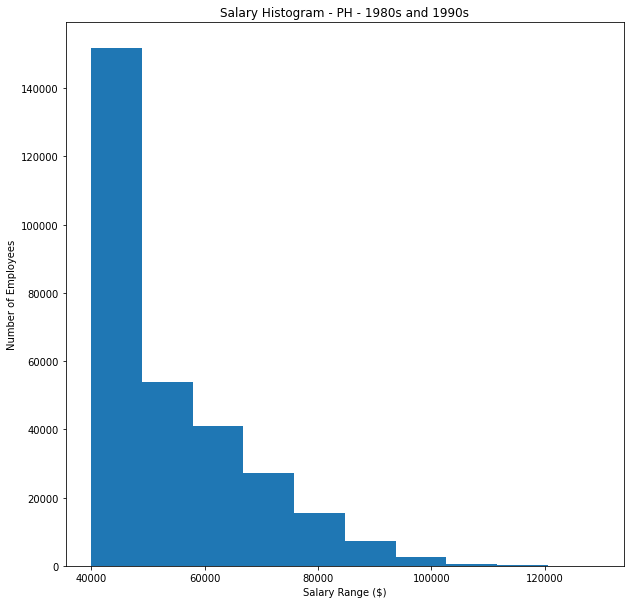

In [9]:
# Display the histogram of the salaries at PH 

plt.figure(figsize=(10, 10))
plt.hist(salary_data['salary'], bins=10)
plt.title("Salary Histogram - PH - 1980s and 1990s")
plt.ylabel("Number of Employees")
plt.xlabel("Salary Range ($)")
plt.show()

In [22]:
# Gain the salary and the title from joining the tables salaries with employees and titles

title_group = pd.read_sql("""SELECT s.salary, t.title
FROM salaries as s
INNER JOIN employees as e ON
e.emp_no = s.emp_no
INNER JOIN titles as t ON
t.title_id = e.emp_title_id""", conn)

title_group.head()

,salary,title
0,78228.0,Staff
1,47883.0,Engineer
2,47585.0,Senior Engineer
3,47561.0,Staff
4,40000.0,Senior Engineer


In [21]:
# Average of the salaries grouped by title

ave_salary_bytitle = title_group.groupby('title').mean()
round(ave_salary_bytitle,2)

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


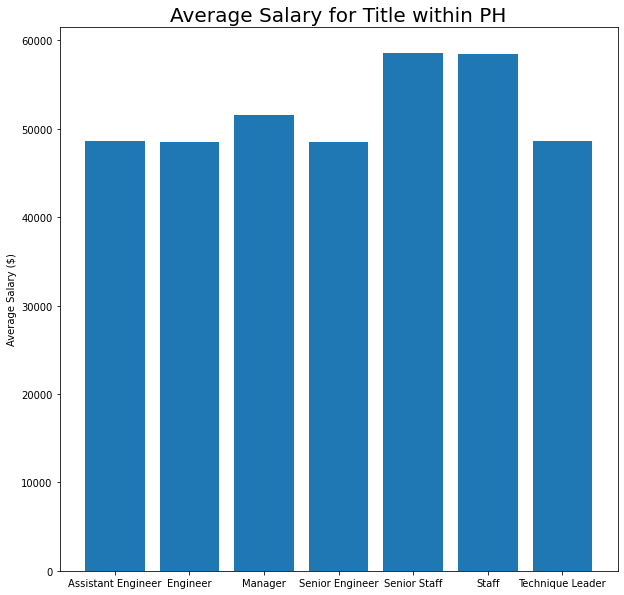

In [20]:
# Display Bar Chart of the average salaries of each role within the company

plt.figure(figsize=(10, 10))
plt.bar(ave_salary_bytitle.index, ave_salary_bytitle['salary'],align="center",width=0.8)
plt.title('Average Salary for Title within PH', fontsize = 20)
plt.ylabel("Average Salary ($)")
plt.show()

